# ALM Example
### Duration and Interest Rate Sensitivity
### Interview with Mr Akshat Mittal
Date 26 March 2019, by Kshitiz Sharma

## <font color='Blue'>Example 1 : How duration matters</font>

In [61]:
'''
Created on Sat Mar 23 10:10:09 2019
@author: kshitizsharma
'''
# Values Declaration
# All amounts are in Million Dollar
# Bank A has following on their balance sheets 
Asset_A = 800
Liability_A = 600
# Duration (interest rate sensitivity)
Asset_Duration_A = 6
Liability_Duration_A = 3
# Maturity Mismatch in years
Maturity_Mismatch = 3

Original_Capital = Asset_A - Liability_A
print("Banks A")
print("Assets: $",Asset_A, "Million Dollars")
print("Liability: $",Liability_A, "Million Dollars")
print("Origianl Capital: $",Original_Capital, "Million Dollars")
print("Weigted Average Duration for Assets:",Asset_Duration_A,"%")
print("Weigted Average Duration for Liability:",Liability_Duration_A,"%")
print("Maturity Mismatch implied by duration:",Maturity_Mismatch,"Years")

Banks A
Assets: $ 800 Million Dollars
Liability: $ 600 Million Dollars
Origianl Capital: $ 200 Million Dollars
Weigted Average Duration for Assets: 6 %
Weigted Average Duration for Liability: 3 %
Maturity Mismatch implied by duration: 3 Years


In [34]:
# CAR(Capital Adequate ratio)
# Capital Adequacy Ratio is also known as Capital to Risk Assets Ratio, is the ratio of a bank's capital to its risk. 
CAR=Original_Capital/Asset_A*100
print("CAR:",CAR,"%")

CAR: 25.0 %


#### <font color='Red'> Case A :</font> Because of a drastic event, interest rate changed by -7% for both asset and liablitities 

In [54]:
# Impact on asset and liablitiy will be as follows 
IR_Change=7

DAsset=IR_Change*Asset_Duration_A
DLiability=IR_Change*Liability_Duration_A
RevisiedAsset=round((1-DAsset/100)*Asset_A,2)
RevisiedLiability=round((1-DLiability/100)*Liability_A,2)

from IPython.display import HTML, display
import tabulate
table = [[" ","","Asset","Liablities","Equity"],
         ["Original Position","A",Asset_A,Liability_A,Original_Capital],
         ["Duration","B",Asset_Duration_A,Liability_Duration_A,""],
        ["Change in interest rate","C",IR_Change,IR_Change],
        ["% Decrease in value","D=B*C",DAsset,DLiability],
        ["Revised Position","E=[1-D]*A",RevisiedAsset,RevisiedLiability,RevisiedAsset-RevisiedLiability]]


display(HTML(tabulate.tabulate(table, tablefmt='html')))

,,Asset,Liablities,Equity
Original Position,A,800,600,200
Duration,B,6,3,
Change in interest rate,C,7,7,
% Decrease in value,D=B*C,42,21,
Revised Position,E=[1-D]*A,464.0,474.0,-10.0


#### Reasoning: CAR and Bank Capital were quite good before a 7% shock in interest rate. The change left us with 10% less capital with bank. Assetss fell by 42% while liablities only by 21%, all because of duration 

#### <font color='Red'> Case B :</font> Because of a drastic event, interest rate changed by +3% for both asset and liablitities 

In [59]:
IR_Change=3

DAsset=IR_Change*Asset_Duration_A
DLiability=IR_Change*Liability_Duration_A
RevisiedAsset=round((1+DAsset/100)*Asset_A,2)
RevisiedLiability=round((1+DLiability/100)*Liability_A,2)

from IPython.display import HTML, display
import tabulate
table = [[" ","","Asset","Liablities","Equity"],
         ["Original Position","A",Asset_A,Liability_A,Original_Capital],
         ["Duration","B",Asset_Duration_A,Liability_Duration_A,""],
        ["Change in interest rate","C",IR_Change,IR_Change],
        ["% Increase in value","D=B*C",DAsset,DLiability],
        ["Revised Position","E=[1+D]*A",RevisiedAsset,RevisiedLiability,RevisiedAsset-RevisiedLiability]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

,,Asset,Liablities,Equity
Original Position,A,800,600,200
Duration,B,6,3,
Change in interest rate,C,3,3,
% Increase in value,D=B*C,18,9,
Revised Position,E=[1+D]*A,944.0,654.0,290.0


## <font color='Blue'>Example 2 : NII (Net Interest Income)</font>

In [99]:
# Bank A

Asset = 2000
Liabilities = 1550
Equity = Asset - Liabilities


### Because of recent change in interest rate. Bank A is interested in finding out the impact of interest rate change on earnings
### Net Interest Income

In [155]:
# Breaking the asset and liabilities into 2 buckets. 
def NII_function(Asset_Returns,Liabilities_Cost):
    Liabilities_1=1250
    Liabilities_2=300

    Rate_sensitive_gap1=Asset/2-Liabilities_1
    Rate_sensitive_gap2=Asset/2-Liabilities_2

    table = [["","Total","0-6 months",'6-12 months'],
             ["Assets",Asset,Asset/2,Asset/2],
             ["Liabilities",Liabilities,Liabilities_1,Liabilities_2],
             ["Equity/Gap",Equity,Rate_sensitive_gap1,Rate_sensitive_gap2]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    table = [["Base","Interest(p.a)"],
             ["Assets",Asset_Returns],
             ["Liabilities",Liabilities_Cost]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    InterestIncome6=2*Asset/2*Asset_Returns/200
    InterestExpense6=2*Liabilities_1*Liabilities_Cost/200

    InterestIncome1year=Asset/2*Asset_Returns/100
    InterestExpense1year=Liabilities_2*Liabilities_Cost/100

    InterestIncomeTotal=InterestIncome6+InterestIncome1year
    InterestexpenseTotal=InterestExpense6+InterestExpense1year

    table = [["","Total","6 months","1 Year"],
        ["Interest Income",InterestIncomeTotal,InterestIncome6,InterestIncome1year],
            ["Interest Expense",InterestexpenseTotal,InterestExpense6,InterestExpense1year],
            ["Net Interest Income/Margin",
             InterestIncomeTotal-InterestexpenseTotal,
             InterestIncome6-InterestExpense6,
            InterestIncome1year-InterestExpense1year]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))


### Calculating NII bank will earn for full year.

In [108]:
# Rates
Asset_returns=11
Liabilities_cost=6
NII_function(Asset_returns,Liabilities_cost)

,Total,0-6 months,6-12 months
Assets,2000,1000.0,1000.0
Liabilities,1550,1250,300
Equity/Gap,450,-250.0,700.0


Base,Interest(p.a)
Assets,11
Liabilities,6


,Total,6 months,1 Year
Interest Income,220.0,110.0,110.0
Interest Expense,93.0,75.0,18.0
Net Interest Income/Margin,127.0,35.0,92.0


### Scenario 1, Impact of changes in Interest Rate. Asset rate decreases by 1%

In [160]:

def NII_function2(Asset_Returns,Asset_change,Liabilities_Cost,Liabilities_change):
    Liabilities_1=1250
    Liabilities_2=300

    Rate_sensitive_gap1=Asset/2-Liabilities_1
    Rate_sensitive_gap2=Asset/2-Liabilities_2

    table = [["","Total","0-6 months",'6-12 months'],
             ["Assets",Asset,Asset/2,Asset/2],
             ["Liabilities",Liabilities,Liabilities_1,Liabilities_2],
             ["Equity/Gap",Equity,Rate_sensitive_gap1,Rate_sensitive_gap2]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    table = [["Base","Interest(p.a)"],
             ["Assets",Asset_Returns],
             ["Liabilities",Liabilities_Cost]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    
    table = [["Scenario","Reinvestment decreases by 1%"],
     ["Assets",Asset_change],
     ["Liabilities",Liabilities_change]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    InterestIncome6=Asset/2*Asset_Returns/200+Asset/2*Asset_change/200
    InterestExpense6=Liabilities_1*Liabilities_Cost/200+Liabilities_1*Liabilities_change/200

    InterestIncome1year=Asset/2*Asset_Returns/100
    InterestExpense1year=Liabilities_2*Liabilities_Cost/100

    InterestIncomeTotal=InterestIncome6+InterestIncome1year
    InterestexpenseTotal=InterestExpense6+InterestExpense1year

    table = [["","Total","6 months","1 Year"],
        ["Interest Income",InterestIncomeTotal,InterestIncome6,InterestIncome1year],
            ["Interest Expense",InterestexpenseTotal,InterestExpense6,InterestExpense1year],
            ["Net Interest Income/Margin",
             InterestIncomeTotal-InterestexpenseTotal,
             InterestIncome6-InterestExpense6,
            InterestIncome1year-InterestExpense1year]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

# Rates
Asset_returns=11
Asset_change=10
Liabilities_cost=6
Liabilities_change=6
NII_function2(Asset_returns,Asset_change,Liabilities_cost,Liabilities_change)


,Total,0-6 months,6-12 months
Assets,2000,1000.0,1000.0
Liabilities,1550,1250,300
Equity/Gap,450,-250.0,700.0


Base,Interest(p.a)
Assets,11
Liabilities,6


Scenario,Reinvestment decreases by 1%
Assets,10
Liabilities,6


,Total,6 months,1 Year
Interest Income,215.0,105.0,110.0
Interest Expense,93.0,75.0,18.0
Net Interest Income/Margin,122.0,30.0,92.0


### Scenario 2, Impact of changes in Interest Rate. Liability rate increases by 1%

In [161]:
# Reinvestment rates remain the same for Assets but the cost 
# of borrowing at the time of recurring the liability increases by 1%

Asset_returns=11
Asset_change=11
Liabilities_cost=6
Liabilities_change=7
NII_function2(Asset_returns,Asset_change,Liabilities_cost,Liabilities_change)



,Total,0-6 months,6-12 months
Assets,2000,1000.0,1000.0
Liabilities,1550,1250,300
Equity/Gap,450,-250.0,700.0


Base,Interest(p.a)
Assets,11
Liabilities,6


Scenario,Reinvestment decreases by 1%
Assets,11
Liabilities,7


,Total,6 months,1 Year
Interest Income,220.0,110.0,110.0
Interest Expense,99.25,81.25,18.0
Net Interest Income/Margin,120.75,28.75,92.0


### Revised Net Income 
### 127, 122.0, 120.75, 

#### Key points
#### 1) When assets re-price faster and rates rise, net interest income rises. When assets re-price faster and rates decline, net interest income declines.
####  2)  When liabilities re-price faster and rates rise, net interest income declines. When liabilities re-price faster and rates decline, net interest income declines.
####  3) In the 6 months bucket assets are 1000 million while deposits are 1,250 million. The net impact for deposits is greater. For this specific bucket net liabilities will re-price faster than assets. While in the next bucket, the 6 – 12 month maturity bucket, net assets will re-price faster.



## <font color='Blue'>Example 3 : (MVE Analysis) Impact of Interest Change on Market Value of Equity</font>

Impace of interest change on market value of shareholder's equity

In [152]:
# Bank A
def MVE_function(Asset_rate_6,Asset_rate_1,Liability_rate_6,Liability_rate_1):
    Asset = 2000
    Liabilities = 1550
    Equity = Asset - Liabilities

    Liabilities_1=1250
    Liabilities_2=300

    Rate_sensitive_gap1=Asset/2-Liabilities_1
    Rate_sensitive_gap2=Asset/2-Liabilities_2

    table = [["","Total","0-6 months",'6-12 months'],
             ["Assets",Asset,Asset/2,Asset/2],
             ["Liabilities",Liabilities,Liabilities_1,Liabilities_2],
             ["Equity/Gap",Equity,Rate_sensitive_gap1,Rate_sensitive_gap2]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))



    table = [["Rate Shock-1","Total","6 Months","1 Year"],
             ["Assets","",Asset_rate_6,Asset_rate_1],
             ["Liabilities","",Liability_rate_6,Liability_rate_1]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    Asset6=Asset/2*Asset_rate_6/100
    Asset1=Asset/2*Asset_rate_1/100
    Liability6=Liabilities_1*Liability_rate_6/100
    Liability1=Liabilities_2*Liability_rate_1/100
    Total_asset=Asset6+Asset1
    Total_Liabilities=Liability6+Liability1
    
    table = [["Fall in MVE","Total","6 Months","1 Year"],
             ["Assets",Total_asset,Asset6,Asset1],
             ["Liabilities",Total_Liabilities,Liability6,Liability1],
             ["Equity",Total_asset-Total_Liabilities,Asset6-Liability6,Asset1-Liability1]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    table = [["Value after Rate",""],
            ["Assets",Asset-Total_asset],
            ["Liabilities",Liabilities-Total_Liabilities],
            ["Equity",Equity-(Total_asset-Total_Liabilities)]]

    display(HTML(tabulate.tabulate(table, tablefmt='html')))





In [153]:
MVE_function(0.5,1,0.5,1)


,Total,0-6 months,6-12 months
Assets,2000,1000.0,1000.0
Liabilities,1550,1250,300
Equity/Gap,450,-250.0,700.0


Rate Shock-1,Total,6 Months,1 Year
Assets,,0.5,1
Liabilities,,0.5,1


Fall in MVE,Total,6 Months,1 Year
Assets,15.0,5.0,10.0
Liabilities,9.25,6.25,3.0
Equity,5.75,-1.25,7.0


Value after Rate,
Assets,1985.0
Liabilities,1540.75
Equity,444.25


#### Shareholders equity is now down to $444.25 million 

# <font color='Red'>Modelling Earnings at Risk</font>

### * Earnings at risk is computed in order to evaluate the impact of interest rate change on earnings. 
### * Approach used is a VaR based approach that takes into account non-parallel shifts in the term structure and its impact on the earnings portfolio of the bank.
### * We take only those items which are interest sensitives and generate income or cash flow


### <font color="blue">Step 1:</font> Data collection and finding returns.

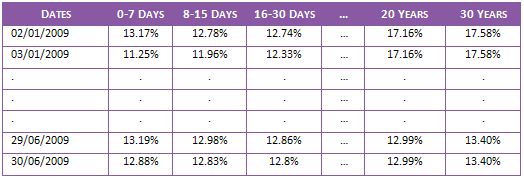

In [166]:
from IPython.display import Image
Image(filename='Image1.png')


In [170]:
import pandas as pd
data=pd.read_csv("Data.csv",delimiter=',')
data.index=data.Date.apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data= data.drop('Date',1)

returns=((dataclose/dataclose.shift(1)-1)*100)[1:]